# AI/ML Challenge

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

## Objective

Developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

Evaluation Criteria

Submissions are evaluated using the F1 Score. How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, an F1 score for your model will be generated and displayed

## About the dataset

The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

    Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

    Survived_1_year == 1, implies that the patient survived after 1 year of treatment

To load the dataset in your jupyter notebook, use the below command:

import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

## Data Description:

    ID_Patient_Care_Situation: Care situation of a patient during treatment

    Diagnosed_Condition: The diagnosed condition of the patient

    ID_Patient: Patient identifier number

    Treatment_with_drugs: Class of drugs used during treatment

    Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

    Patient_Age: Age of the patient

    Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

    Patient_Smoker: If the patient was a smoker or not

    Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

    Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

To load the test dataset in your jupyter notebook, use the below command:

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')


In [1]:
# Importing libraries 
import pandas as pd                   # Data analysis and manipulation tool
import numpy as np                    # A fundamental package for scientific computing with Python
import matplotlib.pyplot as plt       # For interactive visualization in Python
import seaborn as sns                 # Data visualization library based on matplotlib. It provides a high-level interface 
                                      # for drawing attractive and informative statistical graphics.
import warnings # to ignore warnings
warnings.filterwarnings('ignore')
from datetime import datetime        

# 1. Loading the training dataset

In [2]:
# Loading the training dataset and checking the first five observations from the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


# 2. Exploratory Data Analysis (EDA)

In [3]:
# Displaying a summary of the dataframe properties
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [4]:
# Basic statistic details
pharma_data.describe().round(2)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.00,23097.00,23097.00,23097.00,23097.00,21862.0,21862.00,21862.00,21862.00,21862.00,21862.00,21862.00,21862.00,23097.00
mean,16545.71,26.41,6261.28,33.21,23.45,0.9,0.14,0.19,0.08,0.39,0.05,0.00,1.75,0.63
std,9532.26,15.03,3595.99,19.55,3.81,0.3,0.34,0.39,0.28,0.49,0.23,0.02,0.77,0.48
min,2.00,0.00,1.00,0.00,1.09,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,8280.00,13.00,3181.00,16.00,20.21,1.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,16597.00,26.00,6242.00,33.00,23.39,1.0,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
75%,24825.00,39.00,9363.00,50.00,26.79,1.0,0.00,0.00,0.00,1.00,0.00,0.00,2.00,1.00
max,33014.00,52.00,12515.00,149.00,30.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00


In [5]:
#Checking survival rate
print('Did the patient survived after 1 year of treatment? 1-Yes 0-No')

pharma_data.Survived_1_year.value_counts()

Did the patient survived after 1 year of treatment? 1-Yes 0-No


1    14603
0     8494
Name: Survived_1_year, dtype: int64

### Checking for missingness in variables

In [6]:
# Checking missing values amount
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [7]:
# Checking percentage of missing values
(pharma_data.isnull().mean()*100).round(2)

ID_Patient_Care_Situation    0.00
Diagnosed_Condition          0.00
Patient_ID                   0.00
Treated_with_drugs           0.06
Patient_Age                  0.00
Patient_Body_Mass_Index      0.00
Patient_Smoker               0.00
Patient_Rural_Urban          0.00
Patient_mental_condition     0.00
A                            5.35
B                            5.35
C                            5.35
D                            5.35
E                            5.35
F                            5.35
Z                            5.35
Number_of_prev_cond          5.35
Survived_1_year              0.00
dtype: float64

 The column ID_Patient_Care_Situation is filled with 23097 different observatiosn , and the column Patient_mental_condition is filled with the same value in all rows. So, this columns could be dropped. The Patient_ID number of unique observations is 10570, meaning some patient were admitted in the hospital for more several times,probably to treat different illness/conditions.

In [8]:
# Creating lists of different types of columns

# List of columns with binary observations, including Patient_Smoker which will be transformed in binary after data pre-processing
binary_cols = [col for col in pharma_data.columns if len(pharma_data[col].unique())<=3]
print(len(binary_cols), 'Binary Columns: ', binary_cols)
print()

# List of columns with continuous observations
continuous_cols = set(list(pharma_data.select_dtypes(include=np.number).columns)) - set(binary_cols)
print(len(continuous_cols), 'Continuous Columns: ', continuous_cols)
print()

# List of columns with categorical observations with more than 3 different values
categorical_cols = set(list(pharma_data.columns)) - set(continuous_cols) - set(binary_cols)
categorical_cols
print(len(categorical_cols), 'Categorical Columns: ', categorical_cols)

11 Binary Columns:  ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Survived_1_year']

6 Continuous Columns:  {'Number_of_prev_cond', 'Patient_Body_Mass_Index', 'Patient_ID', 'Patient_Age', 'Diagnosed_Condition', 'ID_Patient_Care_Situation'}

1 Categorical Columns:  {'Treated_with_drugs'}


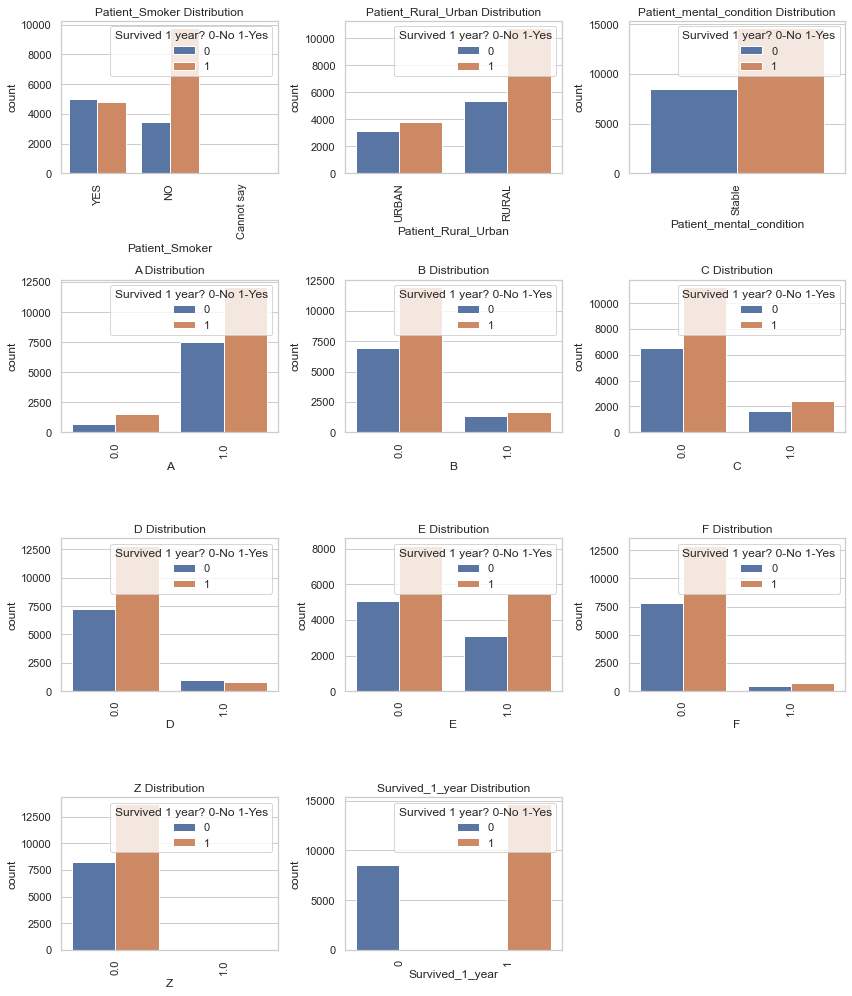

In [9]:
# Creating a function to draw bar charts for variables with binary observations

def draw_graph_cat(dataframe, type_cols, rows, cols):
    fig = plt.figure(figsize=(12,14))
    sns.set_theme(style="whitegrid")
    for i, feature in enumerate(type_cols):
        ax=fig.add_subplot(rows, cols, i+1)
        sns.countplot(x=feature,  hue='Survived_1_year',  data=pharma_data)
        ax.set_title(feature+ ' Distribution')
        plt.xticks(rotation=90)
        plt.legend(title= 'Survived 1 year? 0-No 1-Yes')
    
    fig.tight_layout()
    plt.show()
draw_graph_cat(pharma_data, binary_cols, 4,3)

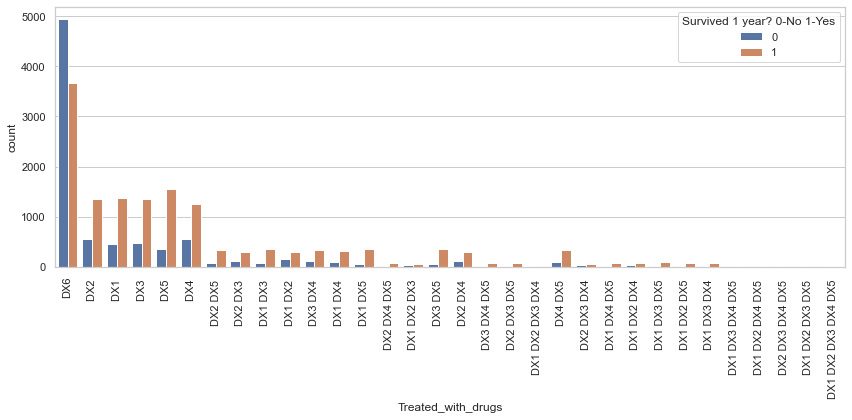

In [10]:
# Plot of the categorical feature 'Treated_with_drugs'

fig = plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year',  data=pharma_data)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title= 'Survived 1 year? 0-No 1-Yes')

fig.tight_layout()
plt.show()

In [11]:
# Exploring the treatment types
pharma_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

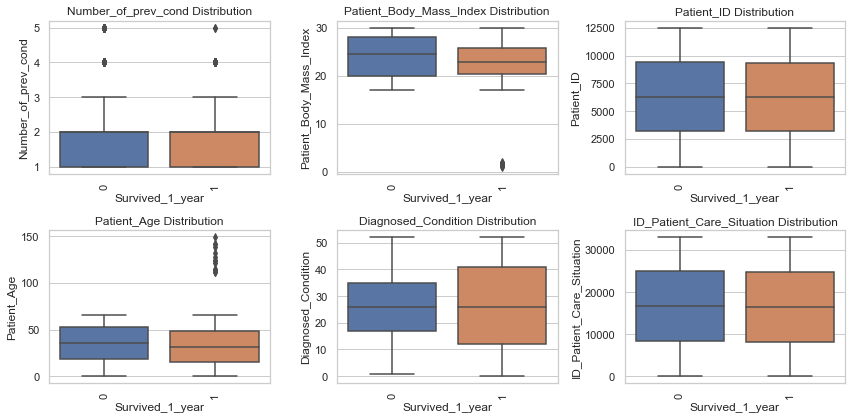

In [12]:
# Box Plots of continuous
def draw_graph_num(dataframe, type_cols, rows, cols):
    fig = plt.figure(figsize=(12,6))
    sns.set_theme(style="whitegrid")
    for i, feature in enumerate(type_cols):
        ax=fig.add_subplot(rows, cols, i+1)
        sns.boxplot(y=feature,  x='Survived_1_year',  data=pharma_data)
        ax.set_title(feature+ ' Distribution')
        plt.xticks(rotation=90)
    
    fig.tight_layout()
    plt.show()
draw_graph_num(pharma_data, continuous_cols, 2,3)

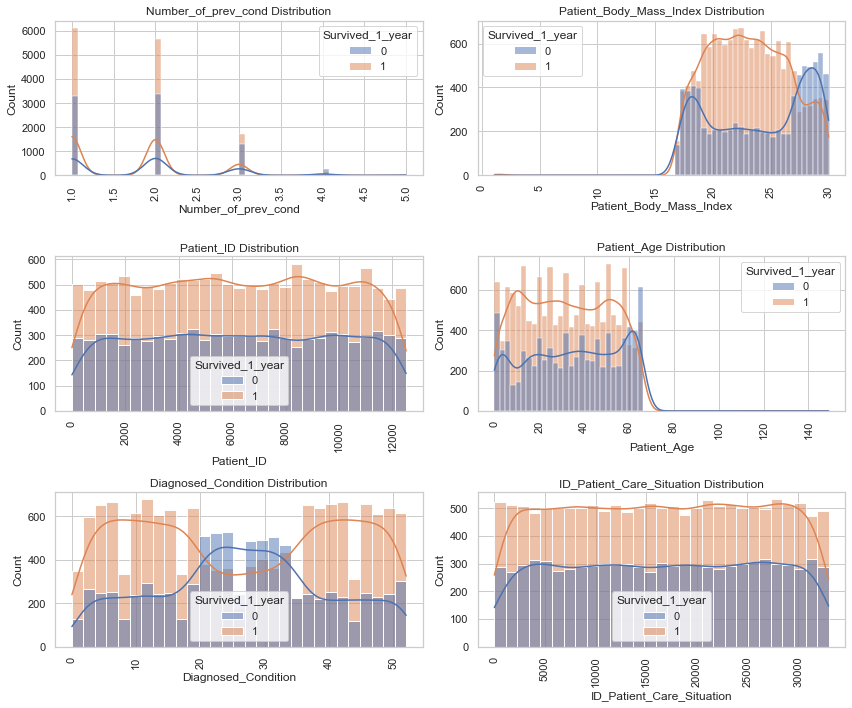

In [13]:
def draw_graph_num(dataframe, type_cols, rows, cols):
    fig = plt.figure(figsize=(12,10))
    sns.set_theme(style="whitegrid")
    for i, feature in enumerate(type_cols):
        ax=fig.add_subplot(rows, cols, i+1)
        sns.histplot(x=feature,  hue='Survived_1_year',  data=pharma_data, legend=True, kde=True)
        ax.set_title(feature+ ' Distribution')
        plt.xticks(rotation=90)
        
    fig.tight_layout()
    plt.show()
draw_graph_num(pharma_data, continuous_cols, 3,2)


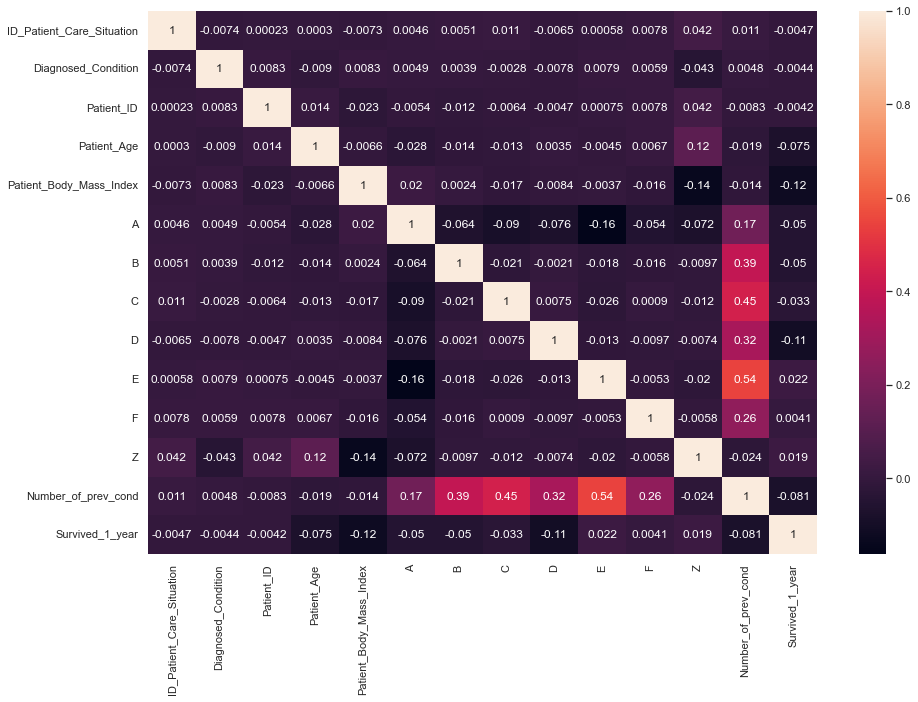

In [14]:
# Correlation matrix of numeric features.
plt.figure(figsize=(15,10))
sns.heatmap(pharma_data.corr(), annot=True)
plt.show()


In [15]:
pharma_data.sort_values(by='Patient_ID').tail(20)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
10401,18074,4,12498,DX1 DX3,15,26.132668,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8842,30963,6,12498,DX6,15,26.132668,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
18687,9122,16,12498,DX3 DX5,15,26.132668,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
15616,20242,21,12499,DX6,39,26.871665,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12457,2018,39,12499,DX6,39,26.871665,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
11741,32220,32,12499,DX5,39,26.871665,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
17023,1127,24,12500,DX2,55,20.572518,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12782,33000,0,12501,NaN,112,1.546500,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.623900,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
19123,33002,0,12503,NaN,115,1.819900,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


# 3. Data cleaning and data pre-processing

In [16]:
# Creating a copy of the dataset to process
pharma_missing = pharma_data

### Dealing with missing values

In [17]:
# Treating missing values using the mode for categorical features or numerical features resulted from One-Hot-Enconde treatment
pharma_missing['Treated_with_drugs'].fillna(pharma_missing['Treated_with_drugs'].mode()[0],inplace=True)
pharma_missing.Patient_Smoker[pharma_missing['Patient_Smoker'] == "Cannot say"] = (pharma_missing['Patient_Smoker'].mode()[0])
pharma_missing['A'].fillna(pharma_missing['A'].mode()[0],inplace=True)
pharma_missing['B'].fillna(pharma_missing['B'].mode()[0],inplace=True)
pharma_missing['C'].fillna(pharma_missing['C'].mode()[0],inplace=True)
pharma_missing['D'].fillna(pharma_missing['D'].mode()[0],inplace=True)
pharma_missing['E'].fillna(pharma_missing['E'].mode()[0],inplace=True)
pharma_missing['F'].fillna(pharma_missing['F'].mode()[0],inplace=True)
pharma_missing['Z'].fillna(pharma_missing['Z'].mode()[0],inplace=True)
pharma_missing['Number_of_prev_cond'].fillna(pharma_missing['Number_of_prev_cond'].mode()[0],inplace=True)

In [18]:
# Checking the absence of missing values
pharma_missing.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [19]:
# Checking the absence of 'Cannot say" in Patient_Smoker 
pharma_missing.Patient_Smoker.value_counts()  

NO     13259
YES     9838
Name: Patient_Smoker, dtype: int64

In [20]:
pharma_missing.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


### Dropping irrelevant columns

In [21]:
# Dropping ID_Patient_Care_Situation and Patient_mental_condition columns
pharma_drop= pharma_missing
pharma_drop = pharma_drop.drop(columns=['ID_Patient_Care_Situation','Patient_mental_condition'])
pharma_drop.head()

,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,3333,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,5740,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,10446,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,12011,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,12513,DX6,128,1.348400,NO,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


### Converting categorical data to numerical data

#### Integer Encoding:

Patient_Smoker: 1-Yes   0-No  
Patient_Rural_Urban: 1-Rural   0-Urban

In [22]:
# Checking Patient_Rural_Urban values
pharma_num = pharma_drop
pharma_num.Patient_Rural_Urban.value_counts()  

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [23]:
# Changing Patient_Smoker:  and Patient_Rural_Urban to numerical values
pharma_num['Patient_Smoker'] = pharma_num['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
pharma_num['Patient_Rural_Urban'] = pharma_num['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'RURAL' else 0)

In [24]:
# Checking Patient_Smoker transformation to numeric
pharma_num.Patient_Smoker.value_counts()

0    13259
1     9838
Name: Patient_Smoker, dtype: int64

In [25]:
# Checking Patient_Rural_Urban transformation to numeric 
pharma_num.Patient_Rural_Urban.value_counts()  

1    16134
0     6963
Name: Patient_Rural_Urban, dtype: int64

#### One-Hot Encoding
Using one-hot encoding by removing categorial columns with more than two observations, where no ordinal relationship exists, and adding new binary variables for observation.

In [26]:
# Using the function str.get_dummies() for One-Hot-Encode
dummies = pharma_num['Treated_with_drugs'].str.get_dummies(sep=' ')
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DX1     23097 non-null  int64
 1   DX2     23097 non-null  int64
 2   DX3     23097 non-null  int64
 3   DX4     23097 non-null  int64
 4   DX5     23097 non-null  int64
 5   DX6     23097 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


In [27]:
dummies['Total_Treated_drug'] = dummies.DX1 + dummies.DX2 + dummies.DX3 + dummies.DX4 + dummies.DX5 + dummies.DX6
dummies.head(10)

,DX1,DX2,DX3,DX4,DX5,DX6,Total_Treated_drug
0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,1
2,0,0,0,0,0,1,1
3,1,0,0,0,0,0,1
4,0,0,0,0,0,1,1
5,0,0,0,0,0,1,1
6,0,0,1,0,0,0,1
7,0,0,0,0,1,0,1
8,0,0,0,1,0,0,1
9,0,0,0,0,0,1,1


In [28]:
# Concatenating new variables to the original dataframe
pharma_num = pd.concat([pharma_num.drop('Treated_with_drugs', axis=1), dummies], axis=1)
pharma_num.head()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,...,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,Total_Treated_drug
0,8,3333,56,18.479385,1,0,1.0,0.0,0.0,0.0,...,0.0,2.0,0,0,0,0,0,0,1,1
1,5,5740,36,22.945566,1,1,1.0,0.0,0.0,0.0,...,0.0,1.0,1,0,1,0,0,0,0,1
2,23,10446,48,27.510027,1,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,0,1,1
3,51,12011,5,19.130976,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,1
4,0,12513,128,1.348400,0,1,0.0,0.0,0.0,0.0,...,1.0,1.0,1,0,0,0,0,0,1,1


In [29]:
pharma_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Patient_ID               23097 non-null  int64  
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  int64  
 5   Patient_Rural_Urban      23097 non-null  int64  
 6   A                        23097 non-null  float64
 7   B                        23097 non-null  float64
 8   C                        23097 non-null  float64
 9   D                        23097 non-null  float64
 10  E                        23097 non-null  float64
 11  F                        23097 non-null  float64
 12  Z                        23097 non-null  float64
 13  Number_of_prev_cond      23097 non-null  float64
 14  Survived_1_year       

#### Visualizing the Training Data pre-processed

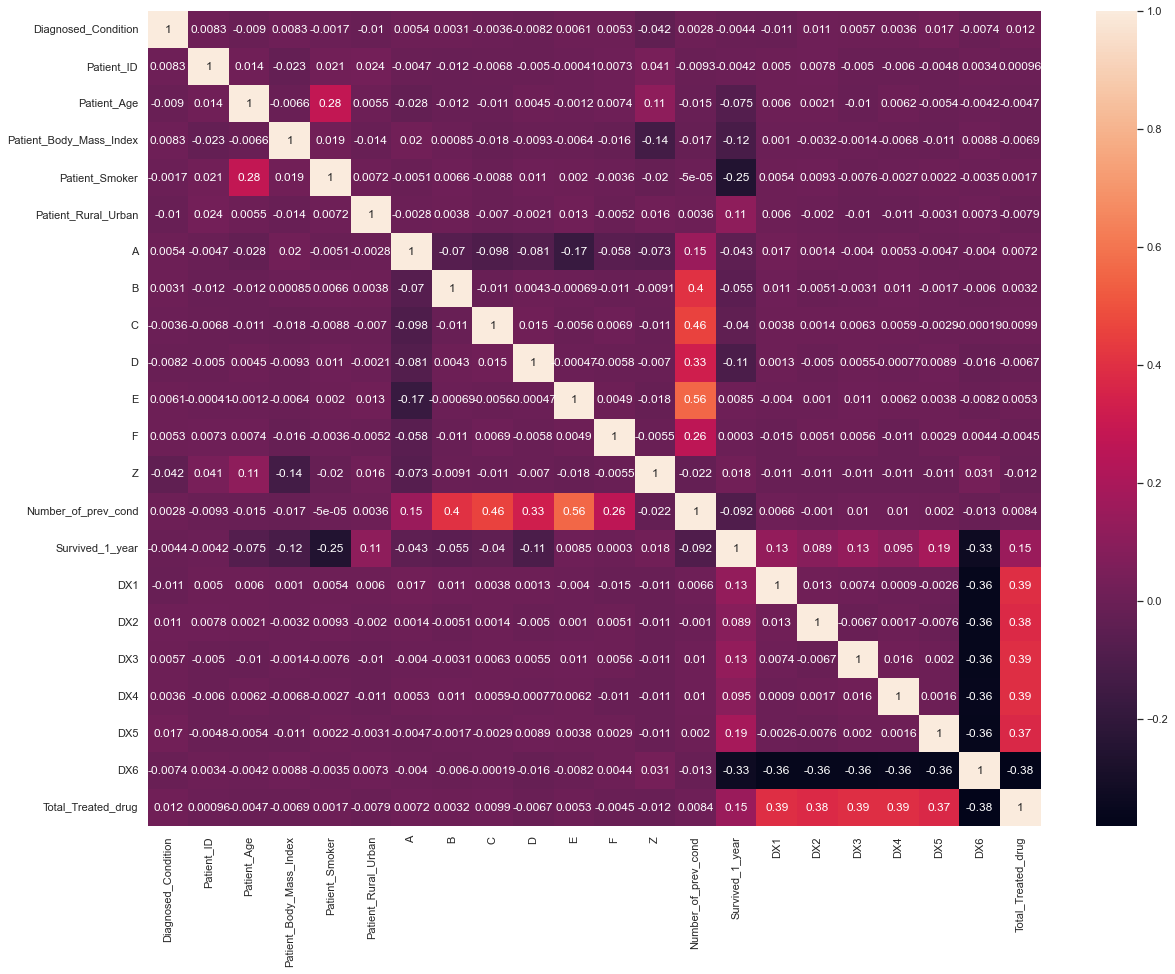

In [30]:
# Correlation matrix of all features
plt.figure(figsize=(20,15))
sns.heatmap(pharma_num.corr(), annot=True)
plt.show()

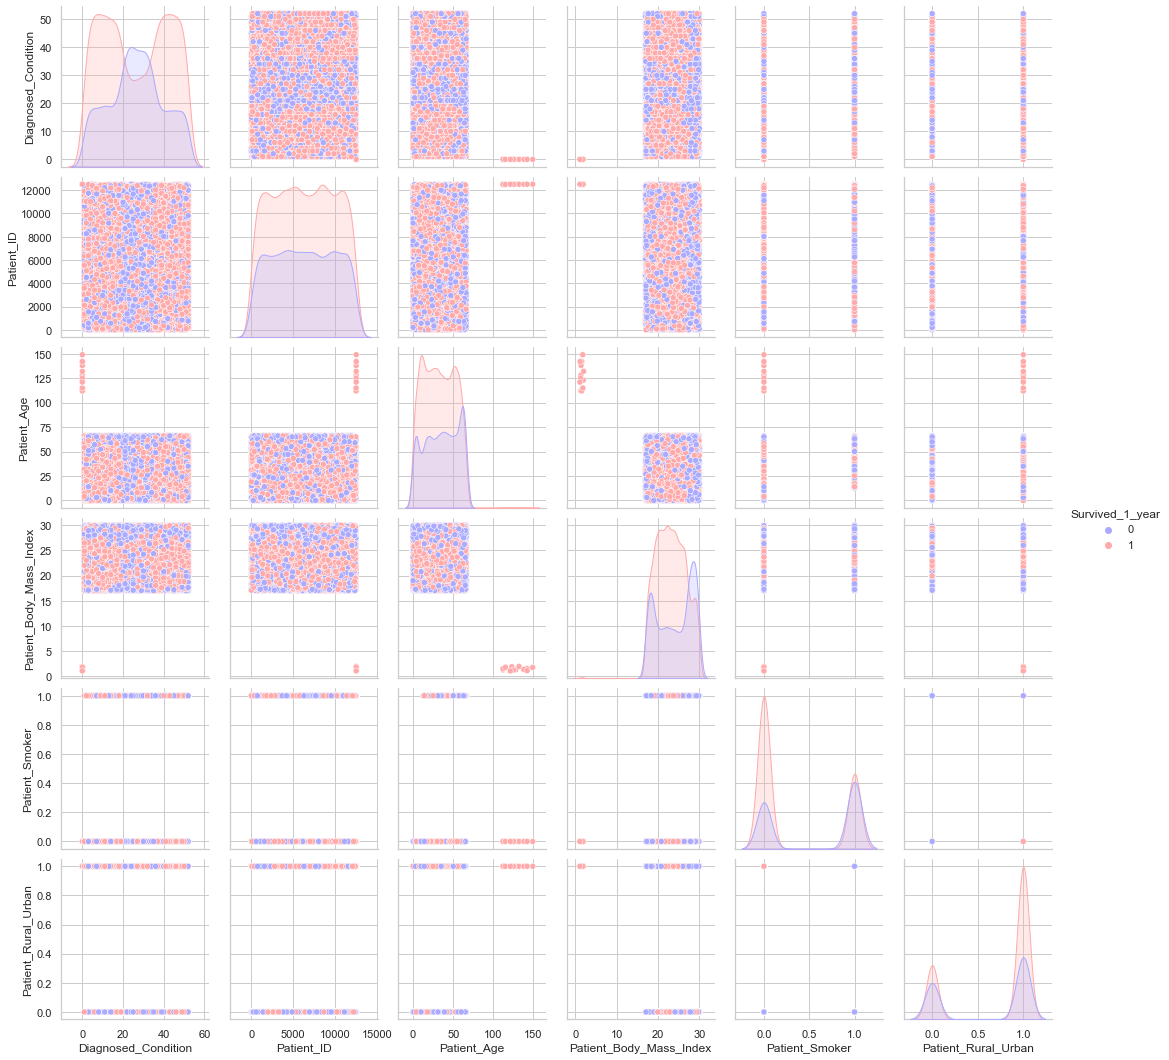

In [31]:
# Pairplot of Slice1: General Information
general_inf = ['Diagnosed_Condition', 'Patient_ID', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Survived_1_year']
pharma_corr_gen = pharma_num[general_inf]
sns.pairplot(pharma_corr_gen, hue='Survived_1_year',palette='bwr')
plt.show()

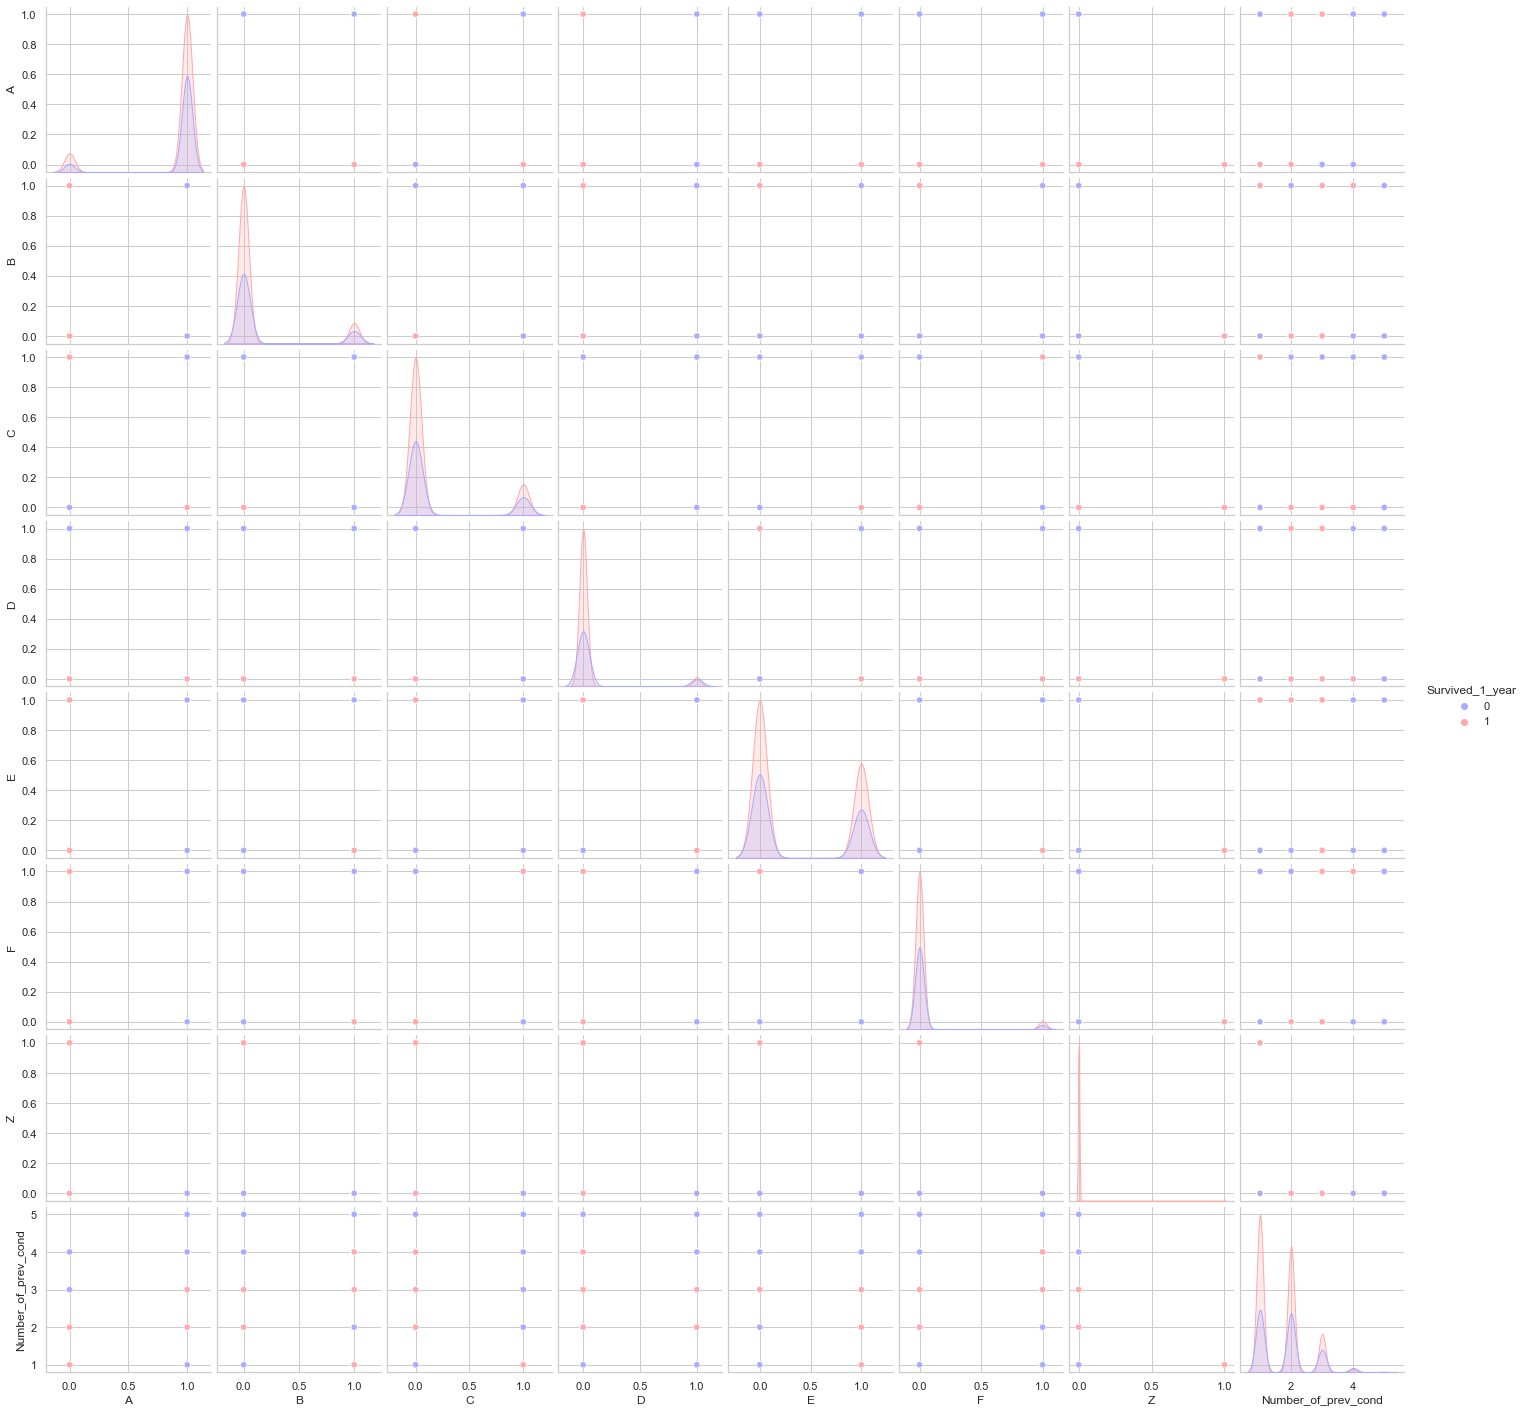

In [32]:
# Pairplot of Slice2: Previous conditions
prev_conditions = ['A','B','C','D','E','F','Z','Number_of_prev_cond', 'Survived_1_year']
pharma_corr_prev = pharma_num[prev_conditions]
sns.pairplot(pharma_corr_prev, hue='Survived_1_year', palette='bwr')
plt.show()

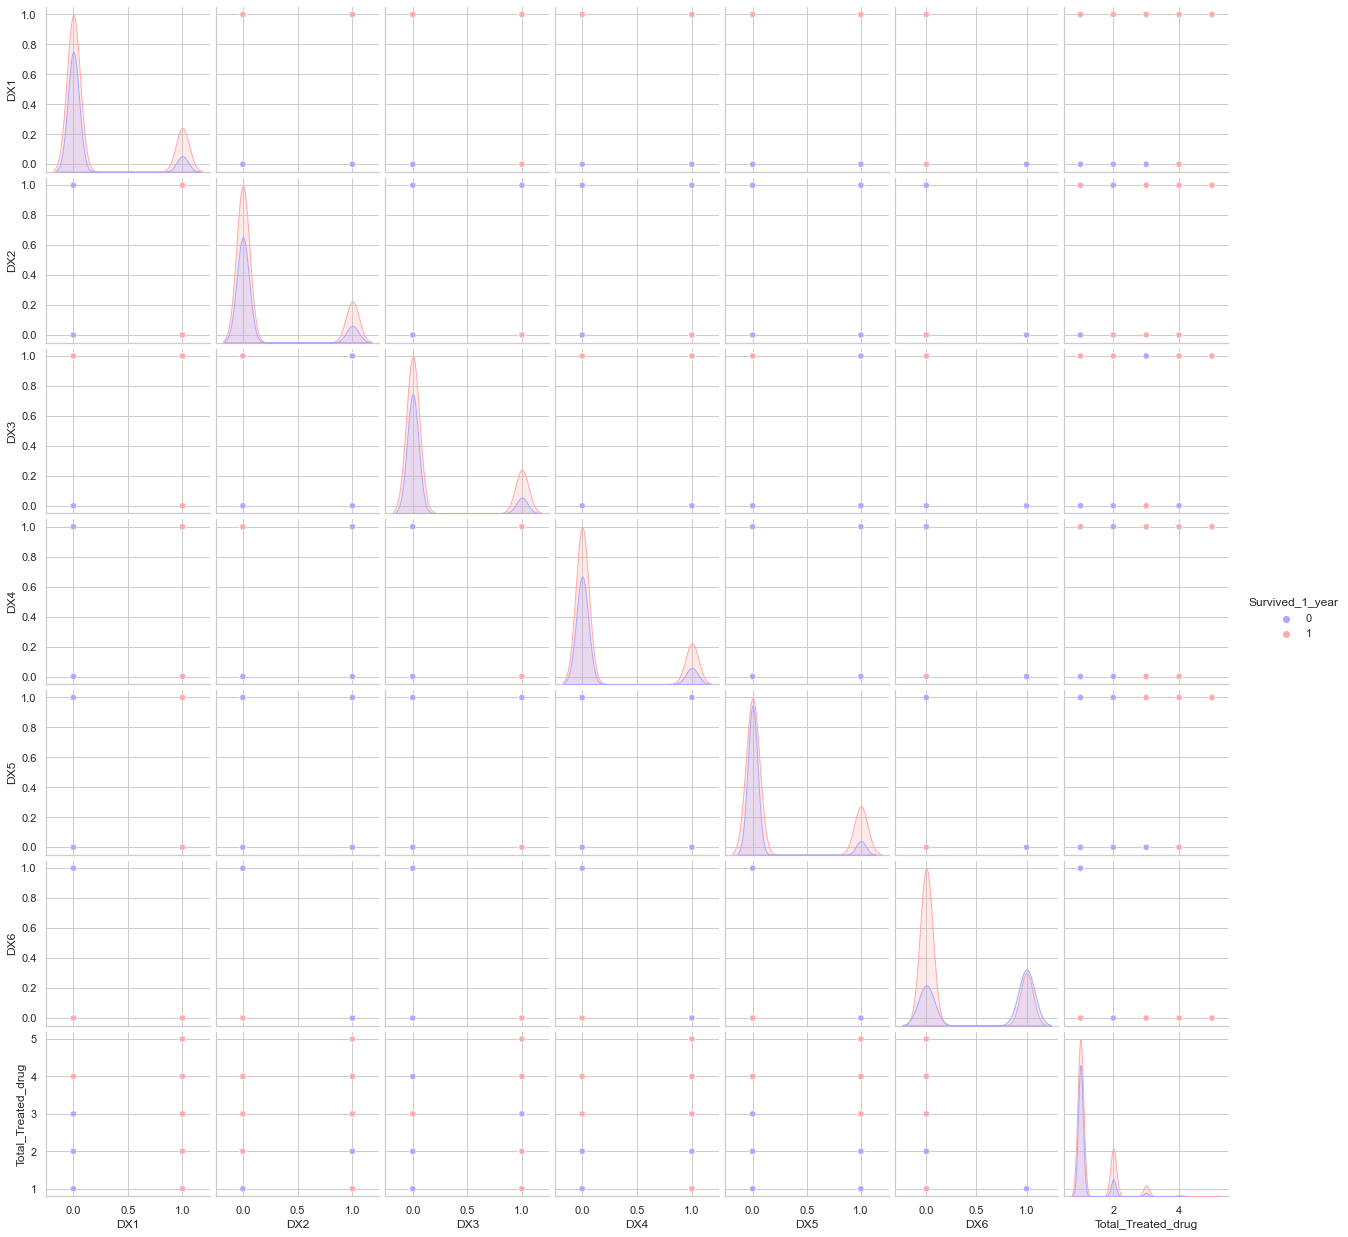

In [33]:
# Pairplot of Slice3: Treated with Drugs
prev_conditions = ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'Total_Treated_drug', 'Survived_1_year']
pharma_corr_prev = pharma_num[prev_conditions]
sns.pairplot(pharma_corr_prev,hue='Survived_1_year', palette='bwr')
plt.show()

## Splitting the training dataset

In [34]:
# Separate feature columns and target column
X_train = pharma_num.drop(columns= 'Survived_1_year')  # feature columns
Y_train = pharma_num['Survived_1_year']     # target column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Patient_ID               23097 non-null  int64  
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  int64  
 5   Patient_Rural_Urban      23097 non-null  int64  
 6   A                        23097 non-null  float64
 7   B                        23097 non-null  float64
 8   C                        23097 non-null  float64
 9   D                        23097 non-null  float64
 10  E                        23097 non-null  float64
 11  F                        23097 non-null  float64
 12  Z                        23097 non-null  float64
 13  Number_of_prev_cond      23097 non-null  float64
 14  DX1                   

In [35]:
Y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 23097 entries, 0 to 23096
Series name: Survived_1_year
Non-Null Count  Dtype
--------------  -----
23097 non-null  int64
dtypes: int64(1)
memory usage: 180.6 KB


# 4. Machine learning bulding and Model evaluation

### 4.1 Logistic Regression Model

In [36]:
# Importing the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression

In [37]:
# Creating an object for the class
log0_model = LogisticRegression(max_iter = 10000)
# Training the model
log0_model.fit(X_train, Y_train)
# Predicted Y
Y_pred_log0 = log0_model.predict(X_train)

In [38]:
#Importing prediction metrics
from sklearn.metrics import accuracy_score, f1_score

In [39]:
# Importing K-Fold Cross Validation
from sklearn.model_selection import cross_validate

In [40]:
# Checking Logistic Regression Model 0 metrics using Cross-Validation 10-fold
log0_score = cross_validate(log0_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])
print('Logistic Regression Model 0')
print('Average train accuracy score...' , log0_score['test_accuracy'].mean(), '±', log0_score['test_accuracy'].std())
print('Average train F1 score...' , log0_score['test_f1'].mean(), '±', log0_score['test_f1'].std())

Logistic Regression Model 0
Average train accuracy score... 0.7164137133257966 ± 0.00822472134892632
Average train F1 score... 0.7884741453615075 ± 0.00640078317219063


In [41]:
# Storing Logistic Regression Model in a dataframe
Model_scores = pd.DataFrame({'Model': ['Log0'],
                            'F1_score_Mean': [log0_score['test_f1'].mean()],
                            'F1_score_STD': [log0_score['test_f1'].std()],
                            'Accuracy_mean': [log0_score['test_accuracy'].mean()],
                            'Accuracy_STD': [log0_score['test_accuracy'].std()]})
Model_scores

,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225


#### Applying Recursive Feature Elimination for feature selection of Logistic Regression Model

RFE automatically uses the accuracy score to identify which features (and combination of features) contribute the most to predicting the target variable.


In [42]:
# Importing RFE class from sklearn library
from sklearn.feature_selection import RFE

rfe = RFE(estimator= log0_model , step = 1) 
# estimator is the baseline model with all features
# step = 1: removes one feature at a time

# Fit the function for ranking the features
feat = rfe.fit(X_train, Y_train)

print('Number of features selected: %d' % feat.n_features_)
names = list(X_train.columns)
feat_sup = list(feat.support_)
selected_list = []
for i in range(len(names)):
    if feat_sup[i] == True:
        selected_list.append(names[i])
        
print('List of the selected features: ', selected_list)


Number of features selected: 10
List of the selected features:  ['Patient_Smoker', 'Patient_Rural_Urban', 'A', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'DX5', 'DX6']


In [43]:
# Creating a new X training dataset with the RFE selected features using 'transform'
X_train_RFE = rfe.transform(X_train)
# Fitting the baseline model with the transformed data
log1_RFE_model = log0_model.fit(X_train_RFE, Y_train)

In [44]:
# Checking Logistic Regression Model 1 RFE metrics using Cross-Validation 10-fold
log1_RFE_score = cross_validate(log1_RFE_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])

# Comparing the new model performance with the baseline model
log1_RFE = ['log1_RFE', log1_RFE_score['test_f1'].mean(),log1_RFE_score['test_f1'].std(), log1_RFE_score['test_accuracy'].mean(), log1_RFE_score['test_accuracy'].std()]
Model_scores.loc[len(Model_scores)] = log1_RFE
Model_scores

,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225


The Logistic Regression Model metrics were not improved by using the RFE feature selection. Although, the curse of dimensionality (number of input variables) was reduced in the dataset with no metric decrease, which can reduce model training time.

### 4.2 Random Forest Model

In [45]:
# Importing the Random Forest Classifier class from sklear.ensemble
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Creating an object for the Random Forest Classifier class
RF0_model = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=1, n_jobs=-1)
# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Training the model
RF0_model.fit(X_train, Y_train)

# Predicted Y
Y_pred_RF0 = RF0_model.predict(X_train)

In [47]:
# Checking Random Forest Model metrics using Cross-Validation 10-fold
RF0_score = cross_validate(RF0_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])
print('Random Forest Model 0')
print('Average train accuracy score...' , RF0_score['test_accuracy'].mean(), '±', RF0_score['test_accuracy'].std())
print('Average train F1 score...' , RF0_score['test_f1'].mean(), '±', RF0_score['test_f1'].std())

Random Forest Model 0
Average train accuracy score... 0.7851237862758002 ± 0.005808264080304597
Average train F1 score... 0.8427459366259773 ± 0.003933513724338536


In [48]:
RF0 = ['RF0', RF0_score['test_f1'].mean(),RF0_score['test_f1'].std(), RF0_score['test_accuracy'].mean(), RF0_score['test_accuracy'].std()]
Model_scores.loc[len(Model_scores)] = RF0
Model_scores

,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225
2,RF0,0.842746,0.003934,0.785124,0.005808


#### Applying Boruta for feature selection of Random Forest Model

Boruta iteratively removes features that are statistically less relevant than a random probe (shadow features: artificial noise variables introduced by the Boruta algorithm). 

In [49]:
# Installing Boruta
!pip install Boruta

Defaulting to user installation because normal site-packages is not writeable


In [50]:
# Importing Boruta Class
from boruta import BorutaPy

start_time = datetime.now()
# Defining Boruta feature selection method
boruta_selector = BorutaPy(RF0_model, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(Y_train))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
I

In [51]:
# Checking selected features
print('Number of significant features selected: %d' % boruta_selector.n_features_)
names = list(X_train.columns)
bfeat_sup = list(boruta_selector.support_)
bselected_list = []
for i in range(len(names)):
    if bfeat_sup[i] == True:
        bselected_list.append(names[i])
        
print('List of the selected features: ', bselected_list)

Number of significant features selected: 16
List of the selected features:  ['Diagnosed_Condition', 'Patient_ID', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'A', 'D', 'Number_of_prev_cond', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'Total_Treated_drug']


In [52]:
# Creating a new X training dataset with the Boruta selected features using 'transform'
X_train_boruta = rfe.transform(X_train)

# Fitting the RF baseline model with the transformed data
RF1_boruta_model = RF0_model.fit(X_train_boruta, Y_train)

In [53]:
# Checking Random Forest Model 1 Boruta metrics using Cross-Validation 10-fold
start_time = datetime.now()

RF1_boruta_score = cross_validate(RF1_boruta_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])

# Comparing the new model performance with the baseline model
RF1_boruta = ['RF1_boruta', RF1_boruta_score['test_f1'].mean(),RF1_boruta_score['test_f1'].std(), RF1_boruta_score['test_accuracy'].mean(), RF1_boruta_score['test_accuracy'].std()]
Model_scores.loc[len(Model_scores)] = RF1_boruta

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
Model_scores

Duration: 0:00:06.566350


,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225
2,RF0,0.842746,0.003934,0.785124,0.005808
3,RF1_boruta,0.843453,0.004224,0.785643,0.005708


# 5. Hyperparameter tunning

In [54]:
#Checking Random Forest parameters in use

from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF0_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 97,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': RandomState(MT19937) at 0x20C028EDA40,
 'verbose': 0,
 'warm_start': False}


Randomized search on hyper parameters for the model

In [55]:
#Importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Creating a parameter grid to sample from during fitting

# n_estimators = number of trees in the foreset
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 3000, num = 10)]
# max_features = max number of features considered for splitting a node
max_features = ['auto', 'sqrt']
# max_depth = max number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(2, 102, num = 20)]
max_depth.append(None)
# min_samples_split = min number of data points placed in a node before the node is split
min_samples_split = [2, 5, 10]
# min_samples_leaf = min number of data points allowed in a leaf node
min_samples_leaf = [1, 2, 4]
# bootstrap = method for selecting samples for training each tree (with or without replacement)
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2,
               7,
               12,
               17,
               23,
               28,
               33,
               38,
               44,
               49,
               54,
               59,
               65,
               70,
               75,
               80,
               86,
               91,
               96,
               102,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000]}


In [57]:
# Random search of parameters 
rf = RandomForestClassifier()

# Searching across 100 different combinations, and use all available cores, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

In [58]:
# Fit the random search model
start_time = datetime.now()

rf_random.fit(X_train, Y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Duration: 0:48:24.253126


In [59]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 17,
 'bootstrap': False}

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 17,
 'bootstrap': False}

In [60]:
# Fit the random search model after Boruta transformed in the dataset
start_time = datetime.now()

# Searching across 100 different combinations, and use all available cores, using 3 fold cross validation
rf_random_boruta = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

rf_random_boruta.fit(X_train_boruta, Y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Duration: 8:30:13.724866


In [61]:
rf_random_boruta.best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': False}

rf_random_boruta.best_params_


{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': False}

In [62]:
# Checking score values for models tested
Model_scores

,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225
2,RF0,0.842746,0.003934,0.785124,0.005808
3,RF1_boruta,0.843453,0.004224,0.785643,0.005708


In [63]:
# Applying the best parameter to the RF baseline model
RF0_hyper_p = RandomForestClassifier(n_estimators=600, 
                                   min_samples_split= 2,
                                   min_samples_leaf= 4,
                                   max_features= 'auto',
                                   max_depth= 17,
                                   bootstrap= False)

In [64]:
# Fitting the RF hyperparameter baseline model with the data
RF0_hyper_model = RF0_hyper_p.fit(X_train, Y_train)

In [65]:
# Checking the RF0 performance (baseline model with all features) with hyperparameter
start_time = datetime.now()
#Checking its metrics score
RF0_hyper_score = cross_validate(RF0_hyper_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])
RF0_hyper = ['RF0_hyper', RF0_hyper_score['test_f1'].mean(),RF0_hyper_score['test_f1'].std(), RF0_hyper_score['test_accuracy'].mean(), RF0_hyper_score['test_accuracy'].std()]
Model_scores.loc[len(Model_scores)] = RF0_hyper

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Model_scores

Duration: 0:02:23.911899


,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225
2,RF0,0.842746,0.003934,0.785124,0.005808
3,RF1_boruta,0.843453,0.004224,0.785643,0.005708
4,RF0_hyper,0.864221,0.004239,0.822921,0.005727


In [66]:
# Building a RF baseline model with the best paramaters
RF1_boruta_hyper = RandomForestClassifier(n_estimators=1500,
                                         min_samples_split= 2,
                                         min_samples_leaf= 2,
                                         max_features= 'sqrt',
                                         max_depth= 7,
                                         bootstrap= False)

In [67]:
# Fitting the RF boruta hyperparameter baseline model with the boruta transformed data
RF1_boruta_hyper_model = RF1_boruta_hyper.fit(X_train_boruta, Y_train)

In [68]:
# Checking the RF1 boruta (boruta selected features) performance with hyperparameter
start_time = datetime.now()

#Checking its metrics score
RF1_boruta_hyper_score = cross_validate(RF1_boruta_hyper_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])
RF1_boruta_hyper = ['RF1_boruta_hyper', RF1_boruta_hyper_score['test_f1'].mean(), RF1_boruta_hyper_score['test_f1'].std(), RF1_boruta_hyper_score['test_accuracy'].mean(), RF1_boruta_hyper_score['test_accuracy'].std()]
Model_scores.loc[len(Model_scores)] = RF1_boruta_hyper

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Model_scores

Duration: 0:03:20.077075


,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225
2,RF0,0.842746,0.003934,0.785124,0.005808
3,RF1_boruta,0.843453,0.004224,0.785643,0.005708
4,RF0_hyper,0.864221,0.004239,0.822921,0.005727
5,RF1_boruta_hyper,0.847960,0.005187,0.793350,0.007072


In [69]:
# Applying Boruta feature selection in the RF0_hyper (baseline model with hyperparameters)
start_time = datetime.now()

# Creating a RF0_hyper baseline model with hyperparameters to apply boruta feature selection
RF0_hyper_model_b = RF0_hyper_p.fit(X_train, Y_train)

# Defining Boruta feature selection method
boruta_hyper_selector = BorutaPy(RF0_hyper_model_b, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_hyper_selector.fit(np.array(X_train), np.array(Y_train))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	14
I

In [70]:
# Checking selected features for RF0_hyper_boruta
print('Number of significant features selected: %d' % boruta_hyper_selector.n_features_)
names = list(X_train.columns)
hbfeat_sup = list(boruta_hyper_selector.support_)
hbselected_list = []
for i in range(len(names)):
    if hbfeat_sup[i] == True:
        hbselected_list.append(names[i])
        
print('List of the selected features: ', hbselected_list)

Number of significant features selected: 5
List of the selected features:  ['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'DX6']


In [71]:
# Creating a new X training dataset with the Boruta selected features using 'transform'
X_train_hyper_boruta = rfe.transform(X_train)

# Fitting the RF baseline model with the transformed data
RF0_hyper_boruta_model = RF0_hyper_model_b.fit(X_train_boruta, Y_train)

In [72]:
# Checking RF0_hyper_boruta metrics using Cross-Validation 10-fold
start_time = datetime.now()

RF0_hyper_boruta_score = cross_validate(RF0_hyper_boruta_model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1'])

# Comparing the new model performance with the other models
RF0_hyper_boruta = ['RF0_hyper_boruta', RF0_hyper_boruta_score['test_f1'].mean(),RF0_hyper_boruta_score['test_f1'].std(), RF0_hyper_boruta_score['test_accuracy'].mean(), RF0_hyper_boruta_score['test_accuracy'].std()]
Model_scores.loc[len(Model_scores)] = RF0_hyper_boruta

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
Model_scores

Duration: 0:00:05.338492


,Model,F1_score_Mean,F1_score_STD,Accuracy_mean,Accuracy_STD
0,Log0,0.788474,0.006401,0.716414,0.008225
1,log1_RFE,0.788474,0.006401,0.716414,0.008225
2,RF0,0.842746,0.003934,0.785124,0.005808
3,RF1_boruta,0.843453,0.004224,0.785643,0.005708
4,RF0_hyper,0.864221,0.004239,0.822921,0.005727
5,RF1_boruta_hyper,0.847960,0.005187,0.793350,0.007072
6,RF0_hyper_boruta,0.862676,0.003668,0.821449,0.005112


It is possible no note that the hyperparameter tunning improved the Random Forest baseline model performance in 2.53 % (F1 score ), but it only improve 0.55% of the Random Forest boruta model (which uses only selected features) performance. However, the Boruta feature selection significant reduced the time spent to select hyperparameters for the model due to reduction of the curse of dimensionaly from 21 features to 16.
Also, applying the Boruta feature selection in the baseline model with hyperparameters reduces the model F1 score in 0.24 %, but  reduces the number of features used in the model to 5.

# 6. Conclusions

All things considered, it is possible to note that:   
   > Random Forest model show increased F1 and Accuracy scores from the Logistic Regression model;   
   > The use of Recursive Feature Elimination and Boruta feature selection for Logistic Regression and Random Forest model, respectivelly,  reduced the curse of dimentionality but generally it did not improved model performance metrics;   
   > The usage of RandomizedSearchCV for hyperparameter tunning significant increased model's performance metrics compared to their basleine models.   

These approaches were applyed in order to develop a model able to predict the patient chances of survival after 1 year of treatment, but many other appoaches could be applyed and the model could be optimized.

Now, let's process the Test dataset to predict the test target.

# 7. Test dataset

### 7.1 Data cleaning and pre-processing Test dataset

Importing the dataset

In [73]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

Dropping irrelevant columns

In [75]:
# Dropping ID_Patient_Care_Situation and Patient_mental_condition columns
test_drop = test_data
test_drop = test_drop.drop(columns=['ID_Patient_Care_Situation','Patient_mental_condition'])

Converting categorical to numerical values

In [76]:
# Checking amount of unique observations in each column
test_drop.nunique()

Diagnosed_Condition          52
Patient_ID                 6418
Treated_with_drugs           32
Patient_Age                  67
Patient_Body_Mass_Index    6418
Patient_Smoker                2
Patient_Rural_Urban           2
A                             2
B                             2
C                             2
D                             2
E                             2
F                             2
Z                             1
Number_of_prev_cond           5
dtype: int64

In [77]:
# Changing Patient_Smoker and Patient_Rural_Urban columns of test_data to numerical values
test_num = test_drop
test_num['Patient_Smoker'] = test_num['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
test_num['Patient_Rural_Urban'] = test_num['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'RURAL' else 0)

In [78]:
# Using the function str.get_dummies() for One-Hot-Encode of Treated_with_drugs
test_dummies = test_num['Treated_with_drugs'].str.get_dummies(sep=' ')
test_dummies['Total_Treated_drug'] = test_dummies.DX1 + test_dummies.DX2 + test_dummies.DX3 + test_dummies.DX4 + test_dummies.DX5 + test_dummies.DX6
# Concatenating new variables to the original dataframe
test_num = pd.concat([test_num.drop('Treated_with_drugs', axis=1), test_dummies], axis=1)
test_num.head()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,...,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,Total_Treated_drug
0,40,3709,16,29.443894,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,1,0,0,0,1
1,52,986,24,26.836321,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,1,1
2,50,11821,63,25.523280,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,1,1,0,2
3,32,3292,42,27.171155,0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0,0,0,0,0,1,1
4,20,9959,50,25.556192,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,1,0,0,0,1


In [79]:
test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      9303 non-null   int64  
 1   Patient_ID               9303 non-null   int64  
 2   Patient_Age              9303 non-null   int64  
 3   Patient_Body_Mass_Index  9303 non-null   float64
 4   Patient_Smoker           9303 non-null   int64  
 5   Patient_Rural_Urban      9303 non-null   int64  
 6   A                        9303 non-null   float64
 7   B                        9303 non-null   float64
 8   C                        9303 non-null   float64
 9   D                        9303 non-null   float64
 10  E                        9303 non-null   float64
 11  F                        9303 non-null   float64
 12  Z                        9303 non-null   float64
 13  Number_of_prev_cond      9303 non-null   float64
 14  DX1                     

### 7.2 Prediction for Test Dataset

In [81]:
# The best model selected fitted using X_train and Y_train
RF0_hyper_model = RF0_hyper_p.fit(X_train, Y_train)

In [82]:
# Predicting the Y Test values using the RF0_hyper_model
prediction = RF0_hyper_model.predict(test_num)

In [84]:
prediction

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [85]:
# Converting the predicion data to a dataframe
submission = pd.DataFrame(prediction)
submission.columns = ["prediction"]

#Saving the data in a CSV file
submission.to_csv('AI_challenge_MTF.csv', index=False)

In [87]:
submission # Submission successful! Your score is 86.4355940676554.

,prediction
0,1
1,1
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0
